## Importing Libraries 

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image Preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [12]:
training_set

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [14]:
for x,y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[208.75 200.75 198.75]
   [212.5  204.5  202.5 ]
   [212.75 204.75 202.75]
   ...
   [182.   173.   176.  ]
   [183.   174.   177.  ]
   [191.   182.   185.  ]]

  [[208.5  200.5  198.5 ]
   [215.5  207.5  205.5 ]
   [217.25 209.25 207.25]
   ...
   [187.   178.   181.  ]
   [186.25 177.25 180.25]
   [192.25 183.25 186.25]]

  [[205.5  197.5  195.5 ]
   [210.75 202.75 200.75]
   [212.5  204.5  202.5 ]
   ...
   [191.   182.   185.  ]
   [188.75 179.75 182.75]
   [191.5  182.5  185.5 ]]

  ...

  [[208.5  199.5  194.5 ]
   [199.   190.   185.  ]
   [204.   195.   190.  ]
   ...
   [179.5  168.5  166.5 ]
   [169.5  158.5  156.5 ]
   [173.75 162.75 160.75]]

  [[202.5  193.5  188.5 ]
   [199.5  190.5  185.5 ]
   [212.25 203.25 198.25]
   ...
   [185.   174.   172.  ]
   [178.   167.   165.  ]
   [173.75 162.75 160.75]]

  [[200.   191.   186.  ]
   [191.25 182.25 177.25]
   [200.25 191.25 186.25]
   ...
   [177.75 166.75 164.75]
   [178.25 167.25 165.25]
   [170.5  159.5  15

## Building Model

In [16]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [18]:
model=Sequential()

In [ ]:
## Building Convolution Layer

In [20]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [22]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [24]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [26]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [28]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [30]:
model.add(Flatten())

In [32]:
model.add(Dense(units=1500,activation='relu'))

In [34]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

In [36]:
model.add(Dropout(0.4))

### Compiling Model

In [38]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                    

### Model Training

In [42]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 [==============================] - 1964s 894ms/step - loss: 7.0996 - accuracy: 0.3910 - val_loss: 0.7275 - val_accuracy: 0.7733
Epoch 2/10
2197/2197 [==============================] - 2062s 939ms/step - loss: 6.7904 - accuracy: 0.4959 - val_loss: 0.5735 - val_accuracy: 0.8203
Epoch 3/10
2197/2197 [==============================] - 2174s 990ms/step - loss: 6.6237 - accuracy: 0.5251 - val_loss: 0.4215 - val_accuracy: 0.8664
Epoch 4/10
2197/2197 [==============================] - 1924s 876ms/step - loss: 6.6082 - accuracy: 0.5404 - val_loss: 0.3577 - val_accuracy: 0.8873
Epoch 5/10
2197/2197 [==============================] - 1958s 891ms/step - loss: 6.5831 - accuracy: 0.5507 - val_loss: 0.3204 - val_accuracy: 0.8956
Epoch 6/10
2197/2197 [==============================] - 2596s 1s/step - loss: 6.5967 - accuracy: 0.5554 - val_loss: 0.2962 - val_accuracy: 0.9033
Epoch 7/10
2197/2197 [==============================] - 1908s 868ms/step - loss: 6.5804 - accuracy: 0.5597 - 

### Model Evaluation

In [52]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 456s 207ms/step - loss: 0.1482 - accuracy: 0.9505


In [53]:
print(train_loss,train_acc)

0.14821335673332214 0.9504659175872803


In [54]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 116s 211ms/step - loss: 0.2823 - accuracy: 0.9107


In [55]:
print(val_loss,val_acc)

0.28227728605270386 0.910653293132782


### Model Saving

In [60]:
model.save("trained_model.keras")

In [62]:
training_history.history

{'loss': [7.099577903747559,
  6.790365695953369,
  6.623728275299072,
  6.608246803283691,
  6.5831475257873535,
  6.5966620445251465,
  6.580353736877441,
  6.537738800048828,
  6.552567958831787,
  6.485079765319824],
 'accuracy': [0.3909524083137512,
  0.4958816468715668,
  0.5250871181488037,
  0.5403655767440796,
  0.5506935119628906,
  0.5553880333900452,
  0.5596699714660645,
  0.5671669244766235,
  0.5686748623847961,
  0.574322521686554],
 'val_loss': [0.7274602055549622,
  0.5735087394714355,
  0.42152124643325806,
  0.35774242877960205,
  0.3203714191913605,
  0.2962054908275604,
  0.28074556589126587,
  0.24075832962989807,
  0.24373938143253326,
  0.282277375459671],
 'val_accuracy': [0.7733325958251953,
  0.8203392028808594,
  0.8663783073425293,
  0.8873207569122314,
  0.8955724835395813,
  0.903312087059021,
  0.904962420463562,
  0.9219212532043457,
  0.9220919609069824,
  0.910653293132782]}

In [64]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [66]:
training_history.history['val_accuracy']

[0.7733325958251953,
 0.8203392028808594,
 0.8663783073425293,
 0.8873207569122314,
 0.8955724835395813,
 0.903312087059021,
 0.904962420463562,
 0.9219212532043457,
 0.9220919609069824,
 0.910653293132782]

### Accuracy Visualization

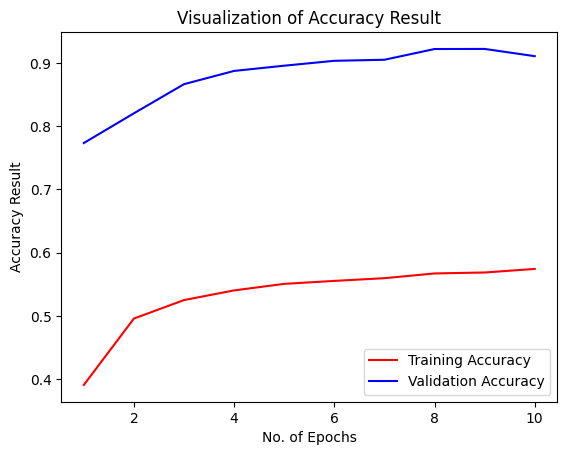

In [68]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [70]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [72]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [74]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 114s 207ms/step


(array([[9.9414247e-01, 5.2686613e-03, 1.9648260e-07, ..., 2.4743561e-09,
         3.7643489e-11, 2.8071854e-08],
        [9.9740207e-01, 3.0538870e-04, 2.1110268e-06, ..., 5.5437930e-08,
         6.5994904e-10, 6.8492070e-09],
        [9.9991405e-01, 4.9706621e-05, 3.1489249e-06, ..., 6.7195284e-11,
         2.8032805e-11, 7.0177961e-09],
        ...,
        [5.7964604e-07, 2.0254017e-11, 2.3687275e-07, ..., 4.1160331e-07,
         6.0767675e-08, 9.9925762e-01],
        [2.5996509e-05, 2.2215715e-08, 2.9338776e-07, ..., 9.4282723e-07,
         7.1923406e-10, 9.9960262e-01],
        [5.4955299e-15, 2.6697057e-17, 1.8873282e-18, ..., 1.6350297e-14,
         5.6465557e-12, 9.9982589e-01]], dtype=float32),
 (17572, 38))

In [76]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [78]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [80]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [82]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [84]:
from sklearn.metrics import classification_report,confusion_matrix

In [86]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.75      0.84       504
                                 Apple___Black_rot       0.95      0.94      0.94       497
                          Apple___Cedar_apple_rust       0.96      0.92      0.94       440
                                   Apple___healthy       0.75      0.94      0.83       502
                               Blueberry___healthy       0.90      0.96      0.93       454
          Cherry_(including_sour)___Powdery_mildew       0.94      0.98      0.96       421
                 Cherry_(including_sour)___healthy       0.92      0.96      0.94       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.79      0.87       410
                       Corn_(maize)___Common_rust_       0.99      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.88      0.98      0.

In [88]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[376,  13,   0, ...,   0,   0,   0],
       [  2, 469,   0, ...,   0,   2,   0],
       [  1,   0, 406, ...,   1,   0,   1],
       ...,
       [  0,   0,   1, ..., 468,   0,   0],
       [  0,   0,   0, ...,   0, 436,   0],
       [  0,   0,   1, ...,   0,   0, 466]], dtype=int64)

### Confusion Matrix Visualization

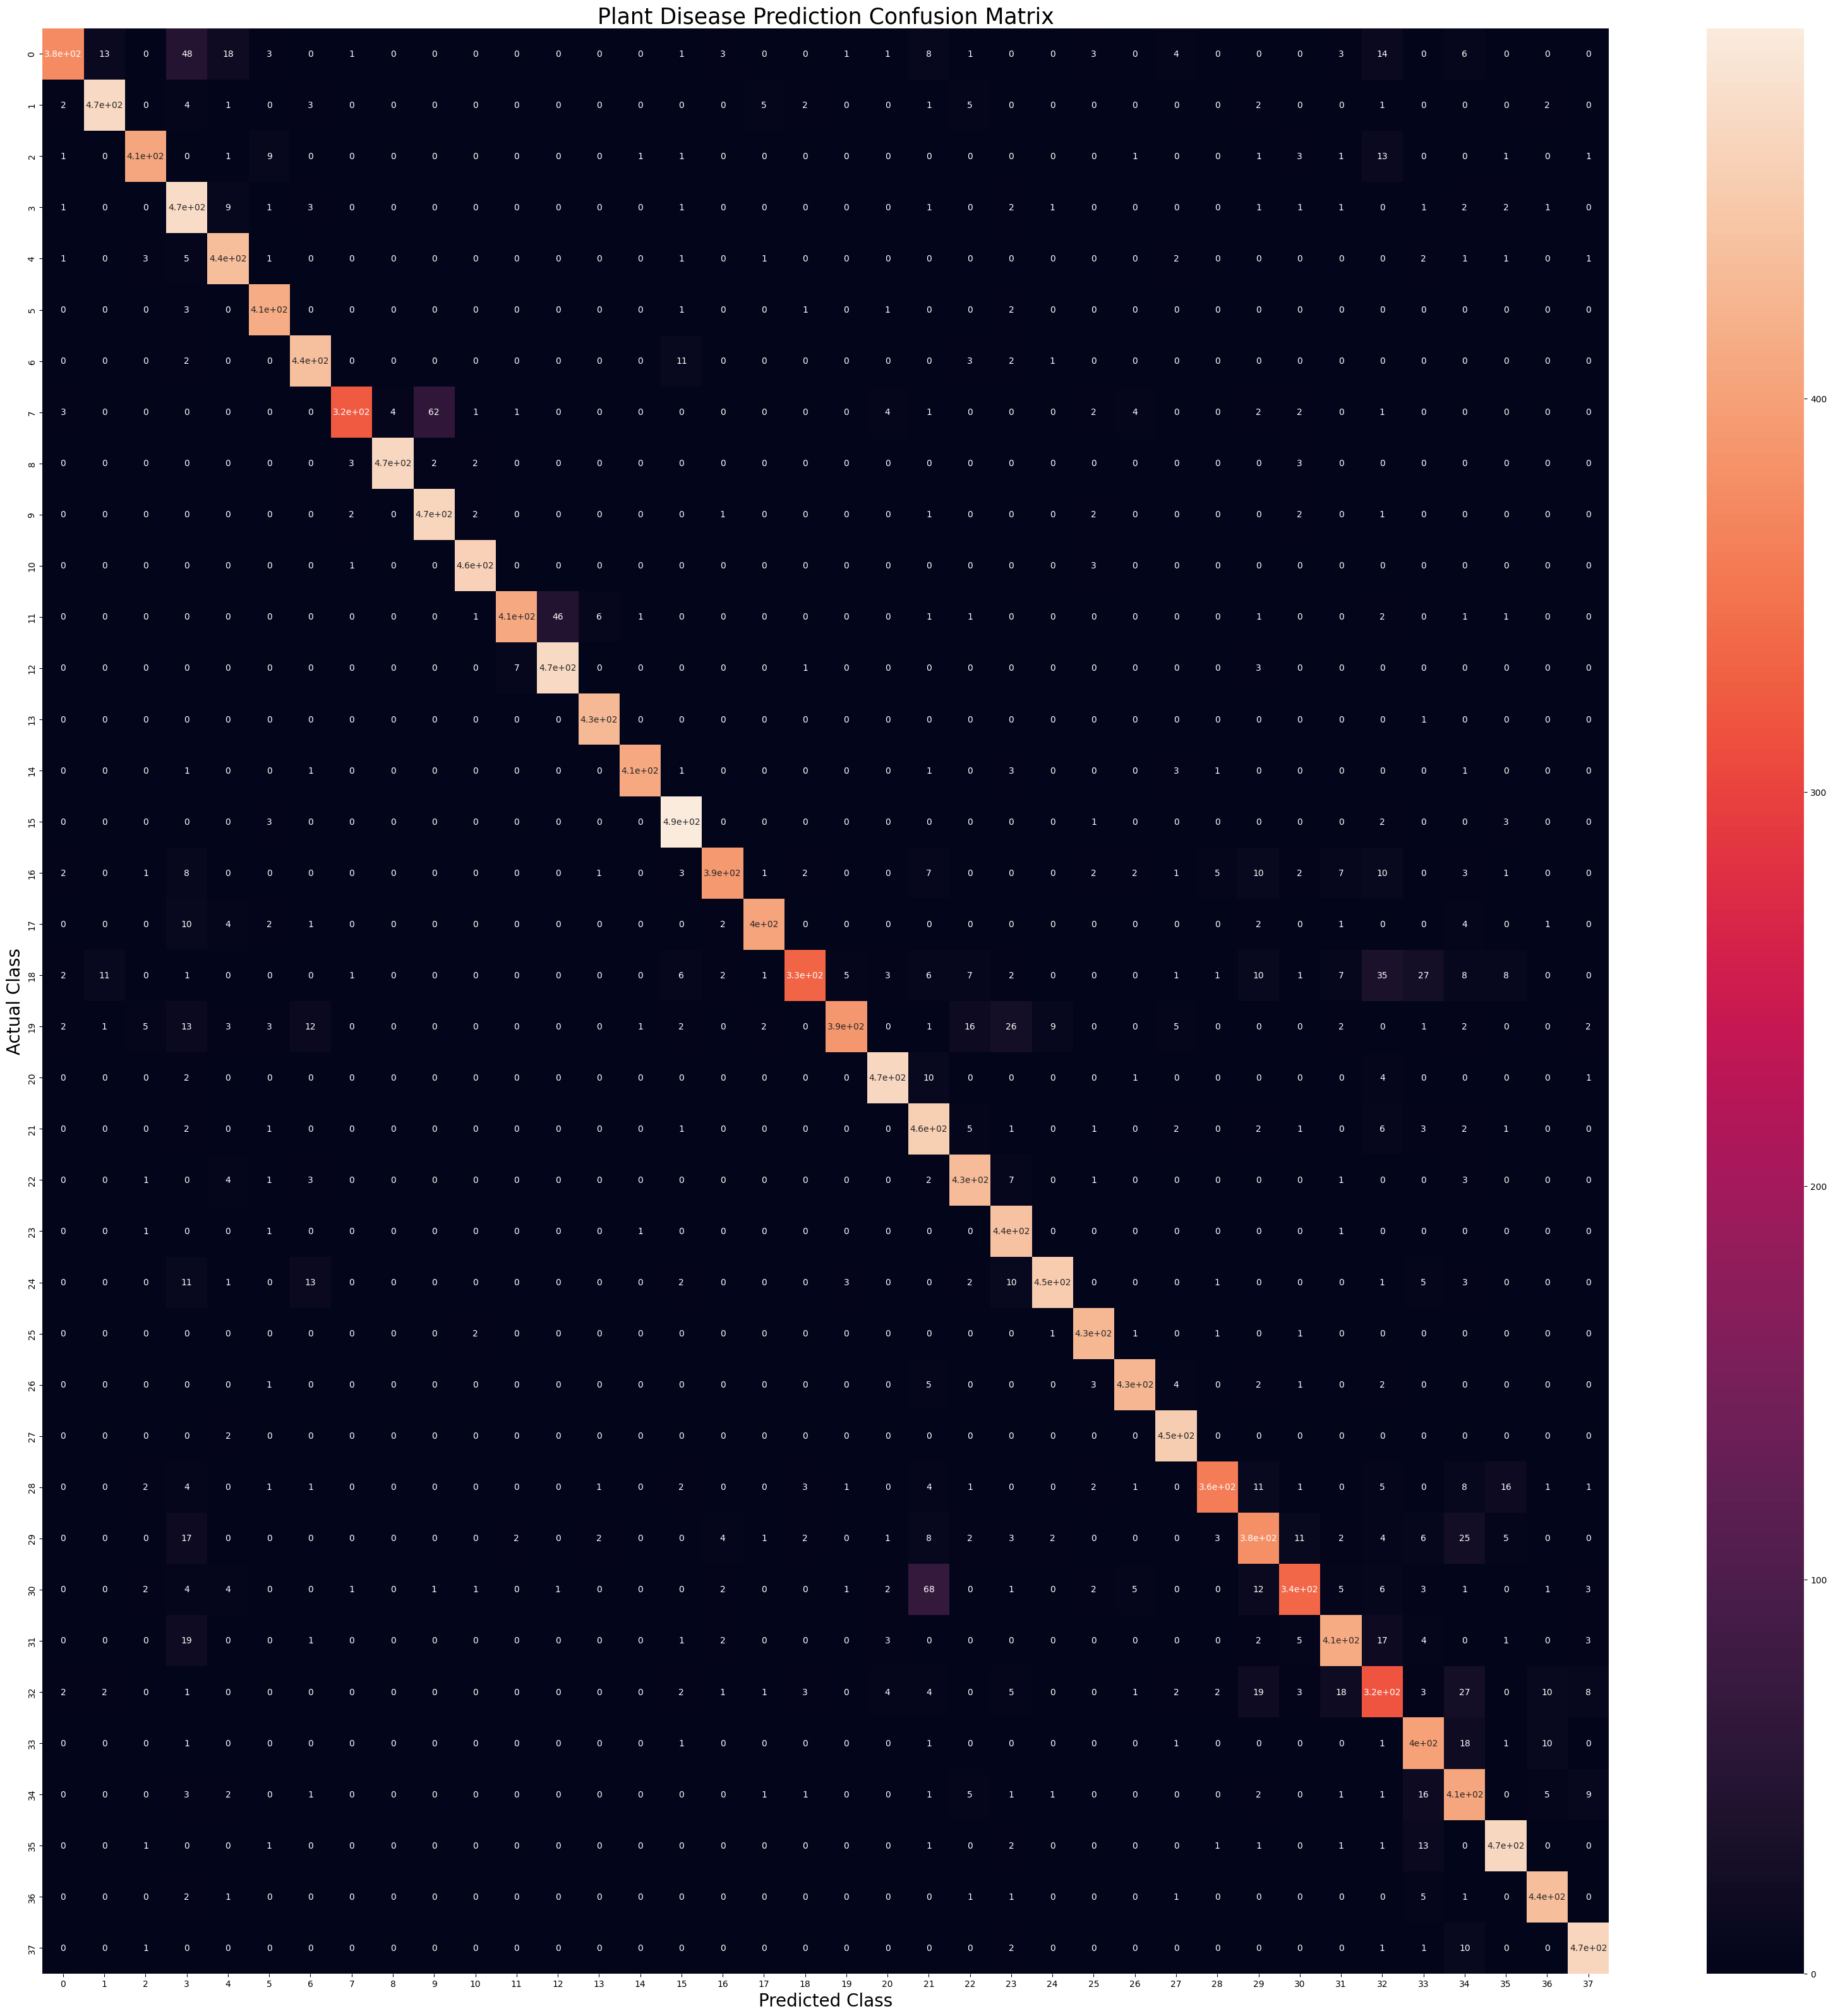

In [90]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()